In [23]:
import numpy as np
import cv2

import PIL
import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [24]:
# Make predictions using ready made model (without any training)
IMAGE_SHAPE = (224, 224)

# 아래는 tensorflow에서 미리 학습시켜준 모델이다.(구글에서)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [25]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [26]:
# read data set
base_src = './drive/MyDrive/machine_learning/datasets/codebasics'
friend_src = base_src + '/goldfish.jpg'

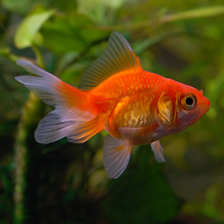

In [27]:
gold_fish = Image.open(friend_src).resize(IMAGE_SHAPE)
gold_fish

In [28]:
# Normalize
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [29]:
# add one more dimension, in this case which is 1
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [30]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape # 총 결과로서 1000 개 class가 있기 때문에
# 1000개 class 각각에 대한 prob 확률을 담은
# 1D array 정보가 담겨있을 것이다 

(1, 1001)

In [31]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [32]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
friend_src = base_src + '/ImageNetLabels.txt'
image_labels = []
with open(friend_src, "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [33]:
image_labels[predicted_label_index]

'goldfish'

In [34]:
# load data sets
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [35]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [36]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/8234846550_fdaf326dbe.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5139969631_743880e01d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18237156988_9ceb46a8de_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14460075029_5cd715bb72_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21134000558_d7d6c9b1fe_n.jpg')]

In [37]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [38]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg')]

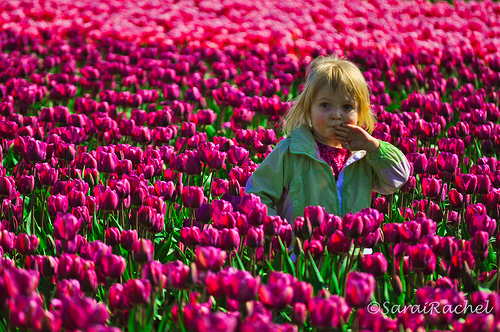

In [39]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [40]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [41]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [42]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg')]

In [43]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'

In [45]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [46]:
img.shape

(332, 500, 3)

In [47]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [48]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items() :
  for image in images :
    img         = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [49]:
X = np.array(X)
y = np.array(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [53]:
# make prediction using pre-trained model on new flowers dataset
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [54]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

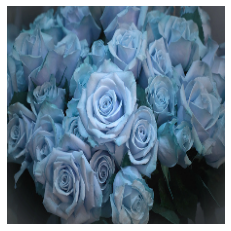

In [55]:
plt.axis('off')
plt.imshow(X[0])

In [56]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

In [57]:
image_labels[795]

'shower curtain'

In [58]:
# Now take pre-trained model and retrain it using flowers images

# 이전과 다른 것은 뭐지 ? last layer 만 다른 것이다
# 즉, 위의 model 에서 last layer 만 제외하고 얻고 싶은 것
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3) ,
    # trainable False : Freeze ! --> do not train
    # all layers will have fixed weight
    trainable = False
)

In [59]:
num_of_flowers = 5

model = tf.keras.Sequential([
      pretrained_model_without_top_layer,
      tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [60]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 75s 823ms/step - loss: 0.8375 - acc: 0.6828
Epoch 2/5
86/86 [==============================] - 71s 828ms/step - loss: 0.4260 - acc: 0.8579
Epoch 3/5
86/86 [==============================] - 71s 829ms/step - loss: 0.3318 - acc: 0.8914
Epoch 4/5
86/86 [==============================] - 71s 824ms/step - loss: 0.2772 - acc: 0.9157
Epoch 5/5
86/86 [==============================] - 72s 841ms/step - loss: 0.2373 - acc: 0.9306


In [61]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 25s 823ms/step - loss: 0.3479 - acc: 0.8769


[0.347871333360672, 0.8769063353538513]